In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from c19_load import load_single_country

In [2]:
# Ingest
CTRY = 'Singapore'
df_sg = load_single_country(country=CTRY)

# Date Display
df_sg['date_dt'] = pd.to_datetime(df_sg['date'])
df_sg['date_mm'] = df_sg['date_dt'].dt.strftime('%m')
df_sg['date_dd'] = df_sg['date_dt'].dt.strftime('%d')
df_sg['date_mmdd'] = df_sg['date_dt'].dt.strftime('%m-%d')

# t_s100: Days after 100 cases have surpassed
# t_s100 = 0 when no. of cases exceed 100, -1 before this date
t_100cases = df_sg[df_sg.total>100].index.min()
df_sg['t'] = df_sg.index
df_sg['t_s100'] = df_sg['t'].apply(lambda x: x-t_100cases)
df_sg['t_s100'] = df_sg['t_s100'].apply(lambda x: x if x>=0 else -1)

df_sg['total_pct_change'] = df_sg['total'].pct_change()
df_sg['total_pct_change'] = df_sg['total_pct_change'].fillna(0.0)
df_sg['total_pct_change'] = df_sg['total_pct_change'].replace(float('inf'), 0.0)
# total_pct_change_rolling_mean: rolling mean (7 lags) of pct_change in cases
df_sg['total_pct_change_rolling_mean'] = df_sg['total_pct_change'].rolling(7).mean()
df_sg['total_pct_change_rolling_mean'] = df_sg['total_pct_change_rolling_mean'].fillna(0.0)

# Settings
NEW__COLNAME = 'new'
CONFIRMED__COLNAME, CONFIRMED__COLOR = 'total', 'FIREBRICK'
ACTIVE__COLNAME, ACTIVE__COLOR = 'active', 'DARKGREEN'
DISCHARGED__COLNAME, DISCHARGED__COLOR  = 'discharged', 'NAVY'
DEATHS__COLNAME, DEATHS__COLOR  = 'deaths', 'DARKSLATEGRAY'

LAST_DAYS = 30

# Constants

DATE__DORSCONORANGE = '2020-02-07'
DATE__CIRCUITBREAKER1 = '2020-04-07'
DATE__CIRCUITBREAKER2 = '2020-04-21'
DATE__CIRCUITBREAKER3 = '2020-05-12'
DATE__PHASE1 = '2020-06-02'
DATE__PHASE2 = '2020-06-19'

# Derived Values
M = df_sg['total_pct_change_rolling_mean'].mean()
count_confirmed = df_sg.tail(1)[CONFIRMED__COLNAME].tolist()[0]
count_active = df_sg.tail(1)[ACTIVE__COLNAME].tolist()[0]
count_discharged = df_sg.tail(1)[DISCHARGED__COLNAME].tolist()[0]
count_deaths = df_sg.tail(1)[DEATHS__COLNAME].tolist()[0]

In [3]:
# Notes
annotate_kwargs = dict(
    s='Based on COVID Data Repository by Johns Hopkins CSSE \nNews updates by CNA, Straits Times\nbryan.blackbee', 
    xy=(0.05, 0.03), xycoords='figure fraction', fontsize=10)

note1text = "2020-01-23: First case detected"
note2text = "2020-02-07: Dorscon Orange Declared"
note2atext = "OTHERS\n2020-03-27: Bars, cinemas and all other entertainment outlets closed, \ntuition & enrichment classes suspended, all religious services suspended"
note2btext = "2020-05-28: MOH revises discharge criteria for Covid-19 patients, \nthose who are well by day 21 can be discharged"
note3text = "2020-04-07: Circuit Breaker Begins"
note4text = "2020-04-21: Circuit Breaker Tighter Measures Start"
note5text = "2020-05-12: Circuit Breaker Measures Relaxed"
note6text = "2020-06-02: Phase 1 Begins"
note7text = "2020-06-19: Phase 2 Begins"

In [4]:
# For testing
display(df_sg.head(2))
# display(df_sg.tail(10))

,country,date,total,new,deaths,discharged,active,date_dt,date_mm,date_dd,date_mmdd,t,t_s100,total_pct_change,total_pct_change_rolling_mean
0,Singapore,2020-01-22,0,0,0,0,0,2020-01-22,01,22,01-22,0,-1,0.0,0.0
1,Singapore,2020-01-23,1,1,0,0,1,2020-01-23,01,23,01-23,1,-1,0.0,0.0


In [5]:
# Generate values for date ranges
x = np.arange(df_sg.shape[0])
df2 = pd.DataFrame({'x' : x, 'y' : 0})

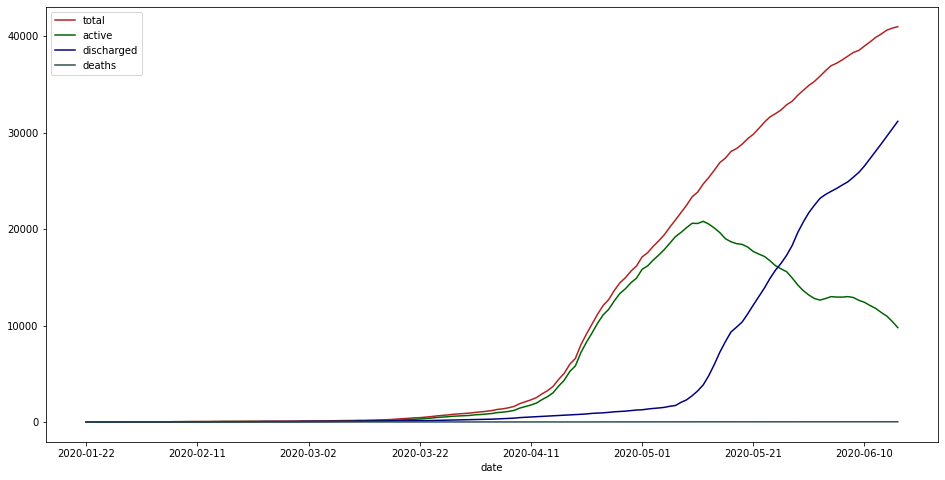

In [6]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,1,1)

# Plot SG statistics
df_sg.plot(kind='line', x='date', y=CONFIRMED__COLNAME, ax=ax, color=CONFIRMED__COLOR)
df_sg.plot(kind='line', x='date', y=ACTIVE__COLNAME, ax=ax, color=ACTIVE__COLOR)
df_sg.plot(kind='line', x='date', y=DISCHARGED__COLNAME, ax=ax, color=DISCHARGED__COLOR)
df_sg.plot(kind='line', x='date', y=DEATHS__COLNAME, ax=ax, color=DEATHS__COLOR)
plt.show()

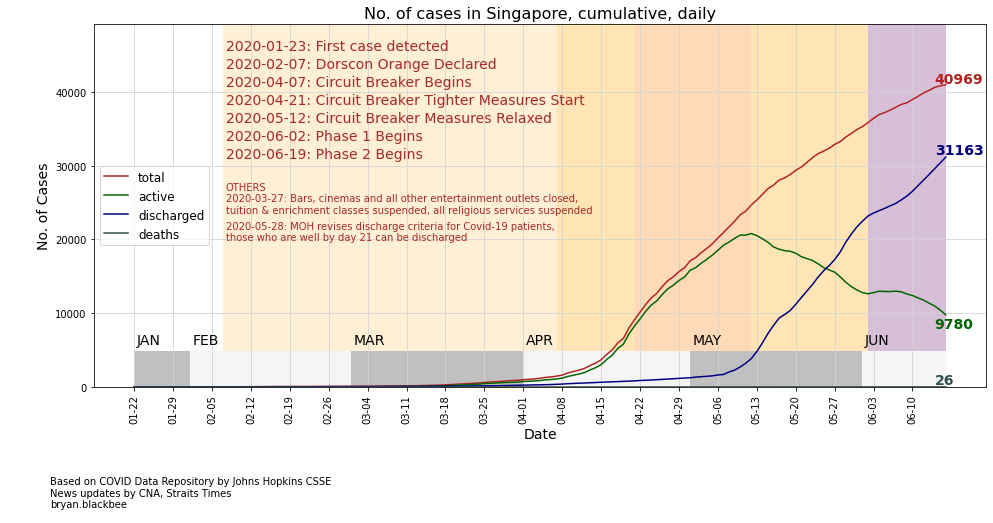

In [7]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,1,1)

# Calculations before plotting
ylim_max = df_sg[CONFIRMED__COLNAME].max() * 1.2

# Plot SG statistics
df_sg.plot(kind='line', x='date', y=CONFIRMED__COLNAME, ax=ax, color=CONFIRMED__COLOR)
df_sg.plot(kind='line', x='date', y=ACTIVE__COLNAME, ax=ax, color=ACTIVE__COLOR)
df_sg.plot(kind='line', x='date', y=DISCHARGED__COLNAME, ax=ax, color=DISCHARGED__COLOR)
df_sg.plot(kind='line', x='date', y=DEATHS__COLNAME, ax=ax, color=DEATHS__COLOR)

# Axes
ax.set_xlabel("Date", fontsize=14)
ax.set_xticks(range(0,df_sg.shape[0],7))
ax.set_xticklabels(df_sg['date_mmdd'].iloc[::7],rotation=90)
ax.set_ylim(0, ylim_max)
ax.set_ylabel("No. of Cases", fontsize=14)

# Feb, Mar, Apr, May, Jun
feb_index = df_sg[df_sg.date=='2020-02-01'].index[0]
mar_index = df_sg[df_sg.date=='2020-03-01'].index[0]
apr_index = df_sg[df_sg.date=='2020-04-01'].index[0]
may_index = df_sg[df_sg.date=='2020-05-01'].index[0]
jun_index = df_sg[df_sg.date=='2020-06-01'].index[0]
ax.fill_between([0,x.max()], ylim_max*0.0, ylim_max*0.1, facecolor='SILVER')
ax.fill_between([feb_index,x.max()], ylim_max*0.0, ylim_max*0.1, facecolor='WHITESMOKE')
ax.fill_between([mar_index,x.max()], ylim_max*0.0, ylim_max*0.1, facecolor='SILVER')
ax.fill_between([apr_index,x.max()], ylim_max*0.0, ylim_max*0.1, facecolor='WHITESMOKE')
ax.fill_between([may_index,x.max()], ylim_max*0.0, ylim_max*0.1, facecolor='SILVER')
ax.fill_between([jun_index,x.max()], ylim_max*0.0, ylim_max*0.1, facecolor='WHITESMOKE')

# DORSCON Orange
do_index = df_sg[df_sg.date==DATE__DORSCONORANGE].index[0]
ax.fill_between([do_index,x.max()], ylim_max*0.1, ylim_max, facecolor='PAPAYAWHIP')
# Circuit Breaker
ckr_index = df_sg[df_sg.date==DATE__CIRCUITBREAKER1].index[0]
ax.fill_between([ckr_index,x.max()], ylim_max*0.1, ylim_max, facecolor='MOCCASIN')
# Circuit Breaker Tighter Measures
eckr_index = df_sg[df_sg.date==DATE__CIRCUITBREAKER2].index[0]
ax.fill_between([eckr_index,x.max()], ylim_max*0.1, ylim_max, facecolor='PEACHPUFF')
# Circuit Breaker
ckr_index = df_sg[df_sg.date==DATE__CIRCUITBREAKER3].index[0]
ax.fill_between([ckr_index,x.max()], ylim_max*0.1, ylim_max, facecolor='MOCCASIN')
# Phase 1
ckr_index = df_sg[df_sg.date==DATE__PHASE1].index[0]
ax.fill_between([ckr_index,x.max()], ylim_max*0.1, ylim_max, facecolor='THISTLE')
# Phase 2
# ckr_index = df_sg[df_sg.date==DATE__CIRCUITBREAKER1].index[0]
# ax.fill_between([ckr_index,x.max()], ylim_max*0.1, ylim_max, facecolor='LIGHTGREEN')

# Grid & Legend
ax.grid(color='LIGHTGRAY')
ax.legend([CONFIRMED__COLNAME, ACTIVE__COLNAME, DISCHARGED__COLNAME, DEATHS__COLNAME], fontsize=12, loc=6)

# Text
ax.set_title("No. of cases in {}, cumulative, daily".format(CTRY), fontsize=16)

ax.text(df_sg.index.max()-2, count_confirmed+200, str(count_confirmed), fontsize=14, fontweight='bold', color=CONFIRMED__COLOR)  
ax.text(df_sg.index.max()-2, count_active-1800, str(count_active), fontsize=14, fontweight='bold', color=ACTIVE__COLOR)
ax.text(df_sg.index.max()-2, count_discharged+400, str(count_discharged), fontsize=14, fontweight='bold', color=DISCHARGED__COLOR)
ax.text(df_sg.index.max()-2, count_deaths+400, str(count_deaths), fontsize=14, fontweight='bold', color=DEATHS__COLOR)

tbegin, tstep, tfsize = 0.98, 0.05, 14
tcolor='BROWN'
ax.text(do_index+0.5, ylim_max*(tbegin-tstep*1),note1text, fontsize=tfsize, color=tcolor)
ax.text(do_index+0.5, ylim_max*(tbegin-tstep*2),note2text, fontsize=tfsize, color=tcolor)
ax.text(do_index+0.5, ylim_max*(tbegin-tstep*3),note3text, fontsize=tfsize, color=tcolor)
ax.text(do_index+0.5, ylim_max*(tbegin-tstep*4),note4text, fontsize=tfsize, color=tcolor)
ax.text(do_index+0.5, ylim_max*(tbegin-tstep*5),note5text, fontsize=tfsize, color=tcolor)
ax.text(do_index+0.5, ylim_max*(tbegin-tstep*6),note6text, fontsize=tfsize, color=tcolor)
ax.text(do_index+0.5, ylim_max*(tbegin-tstep*7),note7text, fontsize=tfsize, color=tcolor)

ax.text(do_index+0.5, ylim_max*(tbegin-tstep*(7+3)),note2atext, fontsize=10, color=tcolor)
ax.text(do_index+0.5, ylim_max*(tbegin-tstep*(7+4.5)),note2btext, fontsize=10, color=tcolor)

ax.text(df_sg.index.min()+0.5,ylim_max*0.12,"JAN", fontsize=14, color="BLACK")
ax.text(feb_index+0.5,ylim_max*0.12,"FEB", fontsize=14, color="BLACK")
ax.text(mar_index+0.5,ylim_max*0.12,"MAR", fontsize=14, color="BLACK")
ax.text(apr_index+0.5,ylim_max*0.12,"APR", fontsize=14, color="BLACK")
ax.text(may_index+0.5,ylim_max*0.12,"MAY", fontsize=14, color="BLACK")
ax.text(jun_index+0.5,ylim_max*0.12,"JUN", fontsize=14, color="BLACK")

# Annotations
ax.annotate(**annotate_kwargs)
plt.subplots_adjust(bottom=0.25)
plt.show()

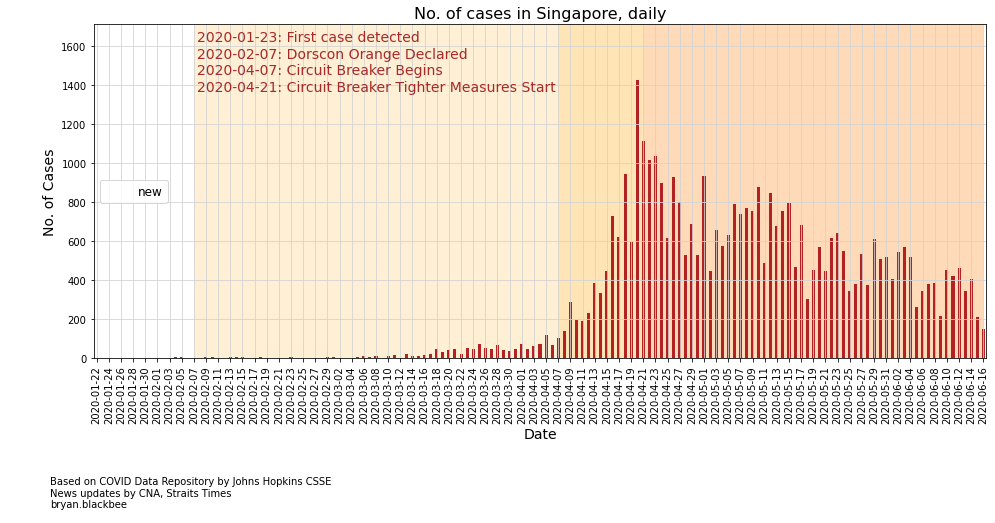

In [8]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,1,1)

# Calculations before plotting
ylim_max = df_sg[NEW__COLNAME].max() * 1.2

# Plot SG statistics
df_sg.plot(kind='bar', x='date', y=NEW__COLNAME, ax=ax, color='FIREBRICK')
df2.plot(kind='line', x='x', y='y', ax=ax, linewidth=0)

# Axes
ax.set_xlabel("Date", fontsize=14)
ax.set_xticks(range(0,df_sg.shape[0],2))
ax.set_xticklabels(df_sg['date'].iloc[::2],rotation=90)
ax.set_ylim(0, ylim_max)
ax.set_ylabel("No. of Cases", fontsize=14)

# DORSCON Orange
do_index = df_sg[df_sg.date=='2020-02-07'].index[0]
ax.fill_between([do_index,x.max()], 0, ylim_max, facecolor='PAPAYAWHIP')
# Circuit Breaker
ckr_index = df_sg[df_sg.date=='2020-04-07'].index[0]
ax.fill_between([ckr_index,x.max()], 0, ylim_max, facecolor='MOCCASIN')
# Circuit Breaker Tighter Measures
ckr_index = df_sg[df_sg.date=='2020-04-21'].index[0]
ax.fill_between([ckr_index,x.max()], 0, ylim_max, facecolor='PEACHPUFF')

# Grid & Legend
ax.grid(color='LIGHTGRAY')
ax.legend([NEW__COLNAME,], fontsize=12, loc=6)

# Text & Annotations
ax.set_title("No. of cases in {}, daily".format(CTRY), fontsize=16)
ax.text(do_index+0.5, ylim_max*0.95-0.15,note1text, fontsize=14, color="BROWN")
ax.text(do_index+0.5, ylim_max*0.90-0.15,note2text, fontsize=14, color="BROWN")
ax.text(do_index+0.5, ylim_max*0.85-0.15,note3text, fontsize=14, color="BROWN")
ax.text(do_index+0.5, ylim_max*0.80-0.15,note4text, fontsize=14, color="BROWN")
ax.annotate(**annotate_kwargs)
plt.subplots_adjust(bottom=0.30)
plt.show()

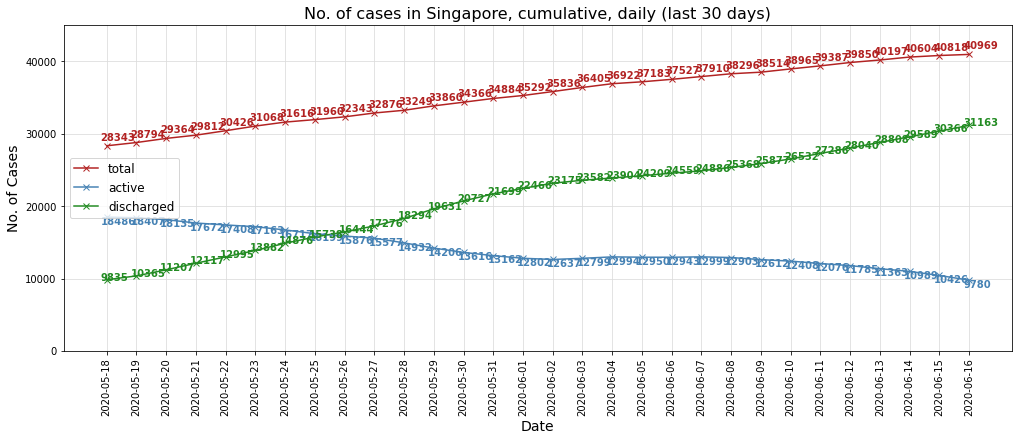

In [9]:
###

fig = plt.figure(figsize=(17,6))
ax = fig.add_subplot(1,1,1)

# Plot SG
df_sg.tail(LAST_DAYS).plot(kind='line', x='date', y=CONFIRMED__COLNAME, ax=ax, marker='x', color='FIREBRICK')
df_sg.tail(LAST_DAYS).plot(kind='line', x='date', y=ACTIVE__COLNAME, ax=ax, marker='x', color='STEELBLUE')
df_sg.tail(LAST_DAYS).plot(kind='line', x='date', y=DISCHARGED__COLNAME, ax=ax, marker='x', color='FORESTGREEN')

# x & y axes
ax.set_xticks(df_sg.head(LAST_DAYS).index)
ax.set_xticklabels(df_sg.tail(LAST_DAYS)['date'], rotation=90)
ax.set_xlabel("Date", fontsize=14)

ylim_max = int(df_sg.tail(LAST_DAYS)[CONFIRMED__COLNAME].max() * 1.1)

ax.set_ylim(0, ylim_max)
ax.set_ylabel("No. of Cases", fontsize=14)
ax.grid(color='GAINSBORO')
ax.legend([CONFIRMED__COLNAME, ACTIVE__COLNAME, DISCHARGED__COLNAME], fontsize=12, loc=6)

l_cfm = df_sg.tail(LAST_DAYS)[CONFIRMED__COLNAME].tolist()
for i, v in enumerate(l_cfm):
    ax.text(i-0.20, v+750, str(v), fontsize=10, fontweight='bold', color='FIREBRICK')
    
l_lv = df_sg.tail(LAST_DAYS)[ACTIVE__COLNAME].tolist()
for i, v in enumerate(l_lv):
    ax.text(i-0.20, max(0,v-1000), str(int(v)), fontsize=10, fontweight='bold', color='STEELBLUE')
    
    
l_rec = df_sg.tail(LAST_DAYS)[DISCHARGED__COLNAME].tolist()
for i, v in enumerate(l_rec):
    ax.text(i-0.20, v-55, str(int(v)), fontsize=10, fontweight='bold', color='FORESTGREEN')
    
ax.set_title("No. of cases in {}, cumulative, daily (last {} days)".format(CTRY, LAST_DAYS), fontsize=16)
plt.show()

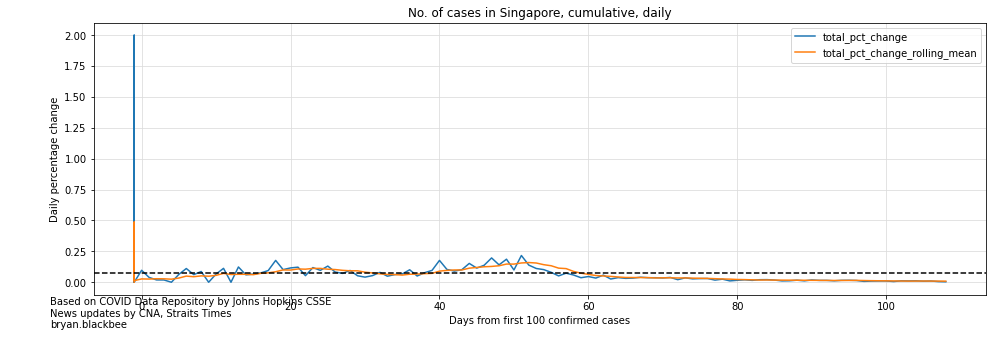

In [10]:
# Plotting growth rate history
fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(1,1,1)

# Plot SG
df_sg.plot(kind='line', x='t_s100', y='total_pct_change', ax=ax)
df_sg.plot(kind='line', x='t_s100', y='total_pct_change_rolling_mean', ax=ax)
ax.axhline(M, ls='--', color='k')

l_cfm = df_sg['total'].tail(1).tolist()
    
ax.set(#yscale='log',
       title="No. of cases in {}, cumulative, daily".format(CTRY),
       xlabel='Days from first 100 confirmed cases',
       ylabel='Daily percentage change')
ax.grid(color='GAINSBORO')
ax.annotate(**annotate_kwargs)
plt.show()


Sources: 

[Singapore confirms first case of Wuhan virus](https://www.channelnewsasia.com/news/singapore/wuhan-virus-pneumonia-singapore-confirms-first-case-12312860)  23 Jan 2020

[Coronavirus outbreak: Singapore raises DORSCON level to Orange; schools to suspend inter-school, external activities](https://www.channelnewsasia.com/news/singapore/wuhan-coronavirus-dorscon-orange-singapore-risk-assessment-12405180)  07 Feb 2020

[Coronavirus: All entertainment venues in Singapore to close, gatherings outside work and school limited to 10 people](https://www.straitstimes.com/singapore/health/all-entertainment-venues-in-singapore-to-close-gatherings-outside-work-and-school) 24 Mar 2020

[Most workplaces to close for one month from Apr 7 to curb spread of COVID-19](https://www.channelnewsasia.com/news/singapore/covid19-workplaces-close-april-one-month-12606684)  03 Apr 2020

[COVID-19 circuit breaker extended until Jun 1 as Singapore aims to bring down community cases ‘decisively’: PM Lee](https://www.channelnewsasia.com/news/singapore/covid-19-circuit-breaker-extended-june-pm-lee-speech-apr-21-12662054)  21 Apr 2020

[Singapore to start gradual easing of circuit breaker measures as COVID-19 community cases decline](https://www.channelnewsasia.com/news/singapore/covid19-some-businesses-to-resume-from-may-5-12696134)
3 May 2020

[Covid-19: How S’pore will exit the circuit breaker in 3 phases after June 1](https://www.todayonline.com/singapore/covid-19-circuit-breaker-be-eased-after-june-1-three-phases-ending-new-normal)
19 May 2020

[COVID-19: Phase 2 of reopening to start from Jun 19, social gatherings of up to five people allowed](https://www.channelnewsasia.com/news/singapore/covid-19-phase-2-of-reopening-to-start-from-jun-19-social-12835758)
16 Jun 2020